In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [3]:
df= pd.read_csv('profiles.csv')



In [4]:
#Feature Engineering for the labels
df['degree'] = df.education.map({
    "graduated from masters program": 2,
    "graduated from law school": 2,
    "graduated from med school": 2,
    "masters programm": 2,
    "law school": 2,
    "med school": 2,
    "working on ph.d program": 2,
    "bachelors degree": 1,
    "bachelor's degree": 1,
    "graduated from college/university": 1,
    "college/university": 1
})
df['degree'].fillna(0, inplace=True)

#Change the column degree to type integer:
df['degree'] = df['degree'].astype(int)




In [5]:
#Feature Engineering essays
essay_cols= ['essay0', 'essay1']
df[essay_cols]= df[essay_cols].replace(np.nan, '', regex=True)
all_essays= df[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df['all_essays']= all_essays.apply(lambda x: len(x))



In [6]:
# encoding the ethnicity column
ethnicity = df['ethnicity']
ethnicity_coded = ethnicity.copy()
for i in range(len(ethnicity_coded)):
    if ethnicity_coded[i] == 'white':
        ethnicity_coded[i] = 1
    elif ethnicity_coded[i] == 'black':
        ethnicity_coded[i] = 2
    elif ethnicity_coded[i] == 'asian':
        ethnicity_coded[i] = 3
    elif ethnicity_coded[i] == 'hispanic or latino':
        ethnicity_coded[i] = 4
    else:
        ethnicity_coded[i] = 0
ethnicity_coded = ethnicity_coded.astype(int)
df['ethnicity_encoded'] = ethnicity_coded





In [7]:
# encoding the drugs column
drugs_mapping= {'never' : 0, 'sometimes' : 1, 'often' : 2}
df['drugs_encoded'] = df.drugs.map(drugs_mapping)




In [8]:
#combine ethnicity_coded and all_essays from df into a variable named data:
data = pd.concat([df.ethnicity_encoded, df.all_essays], axis = 1)

In [12]:
#normalize the data within the variable data using MinMaxScaler
x = data
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
 
feature_data = pd.DataFrame(x_scaled, columns=data.columns)






In [14]:
#split the dataset into train and test set
train_data, test_data, train_labels, test_labels = train_test_split(feature_data, df.degree.values, test_size=0.2, random_state=42)

In [16]:
#built a for loop to find the best value for n_neighbors. store it in a variable called best_n_neighbors
best_n_neighbors = []
for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_data, train_labels)
    score= model.score(test_data, test_labels)
    best_n_neighbors.append(score)




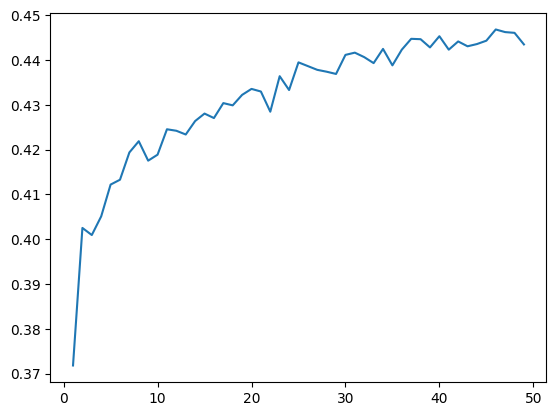

In [17]:
plt.plot(range(1,50), best_n_neighbors)
plt.show()

In [23]:

#Train the model with n_neighbors = 46
model= KNeighborsClassifier(n_neighbors= 46)
model.fit(train_data, train_labels)


KNeighborsClassifier(n_neighbors=46)

In [24]:
#Evaluate the model on the test set:
print(model.score(test_data, test_labels))




0.44678899082568807
